## Experiments & Model Building 

In [45]:
# In this section, I will begin to train and build several Machine Learning algorithms. Due to the fact, 
# that our target variable is imbalanced and we have lots of features (out of which many are redundant and 
# couse a lot of bias in the model), we must determine which resampling techniques and 
# which feature selection techniques should be applied. 
# Thus, the following combinations of techniques will be analysed and then choose the best combination out of all. 
# For resampling techniques, I am going to try SMOTE and ADASYN from oversampling module as described in part 1.
# For feature selection techniques, I am going to try Principal Component Analyses(PCA), Feature elimination with 
# low variance, univariate feature selection using chi2 test and tree-based feature selection methods. 
# Thus, we have 2 resampling and 4 feature selection techniques, aka. overall 8 combination. 
# In this second part, we try PCA with SMOTE and  ADASYN.
# Our evaluation criteria will be the accuracy and recall scores. In addition,we will look at the ROC AUC curves.

In [50]:
# Importing the libraries for model building and preprocessing
%matplotlib notebook
import dataframe_image as dfi
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## Experiment 1 PCA + SMOTE

<IPython.core.display.Javascript object>


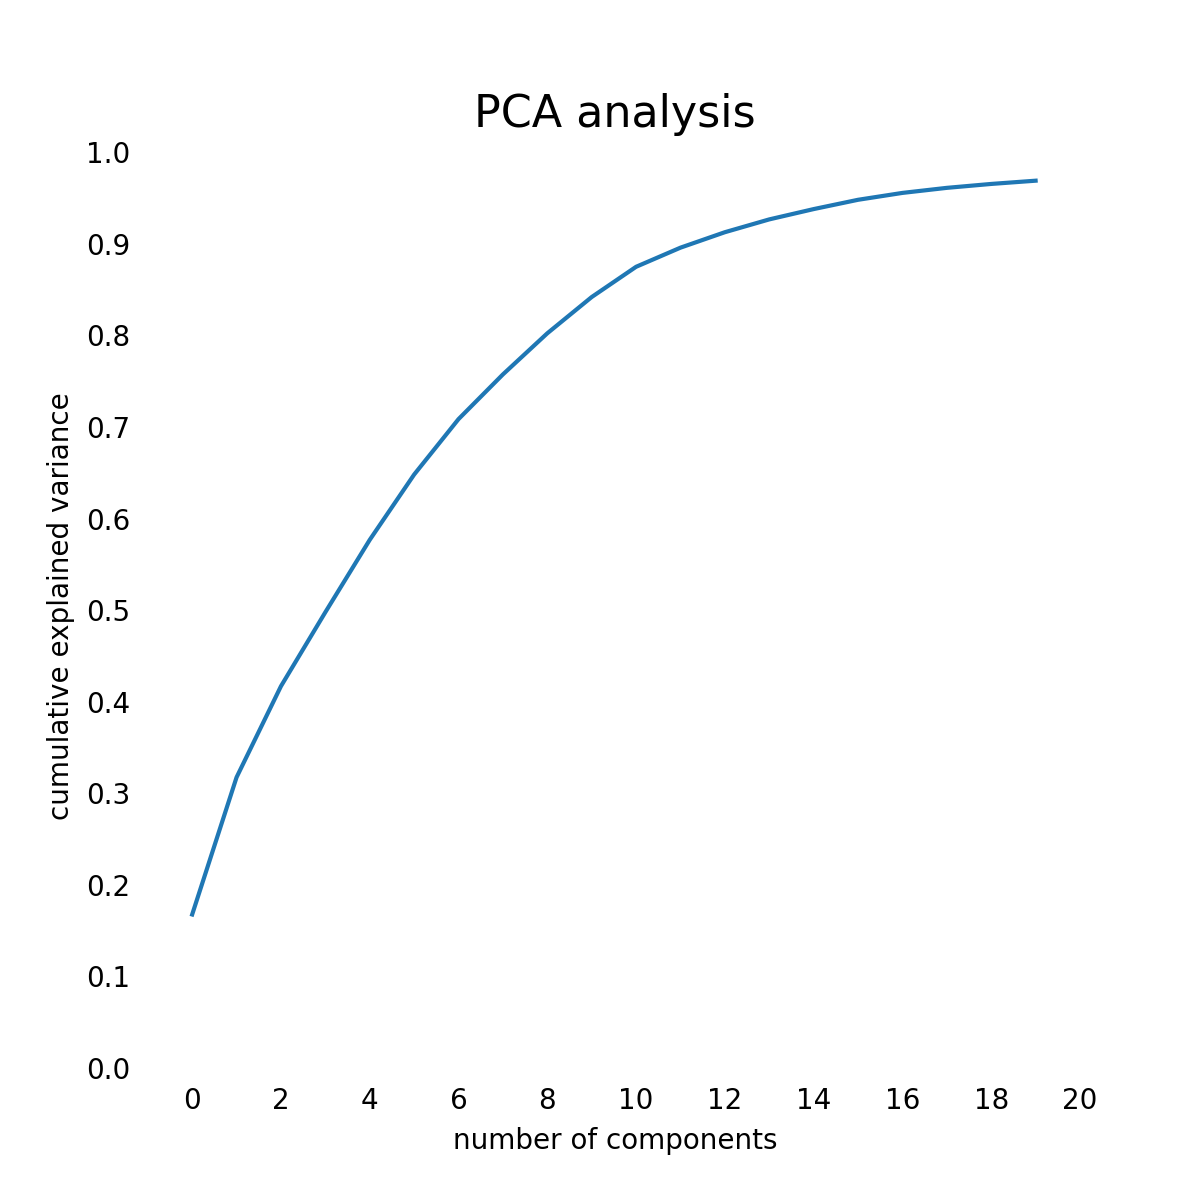

In [61]:
data = pd.read_csv('data.csv')
data.columns = data.columns.str.lstrip()
data.rename({'Bankrupt?' : 'Bankruptcy'}, axis = 1, inplace=True)
X = data.drop('Bankruptcy', axis = 1)
y = data['Bankruptcy']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# Standardize 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA construction 
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_pca= pca.transform(X_train)
X_test_pca = pca.transform(X_test)


plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('PCA analysis', fontsize=16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(left=False, bottom=False)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 22, 2))
#plt.savefig('PCA analysis')
plt.show();

<IPython.core.display.Javascript object>


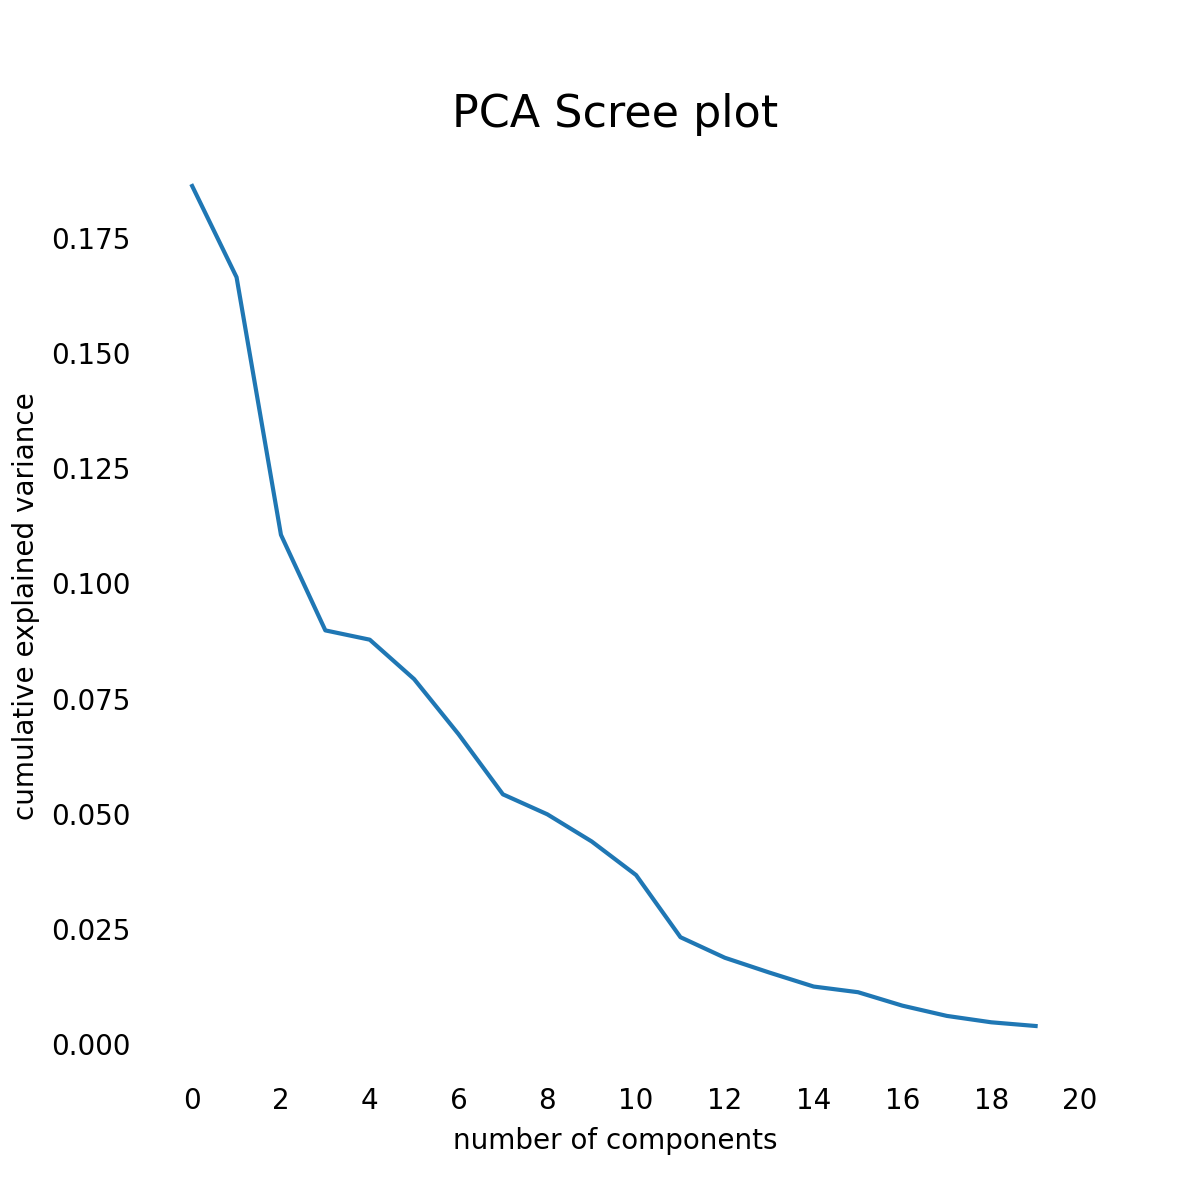

In [62]:
# Initilizing PCA and plotting the PCA Scree plot 
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_pca= pca.transform(X_train)
X_test_pca = pca.transform(X_test)
# Scree plot
plt.figure(figsize=(6,6))
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.xticks(np.arange(0, 22, 2))
plt.ylabel('cumulative explained variance')
plt.title('PCA Scree plot', fontsize=16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(left=False, bottom=False)
plt.savefig('PCA scree plot')
plt.show();

In [42]:
# Resampling 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train_ad, y_train_ad = oversample.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>


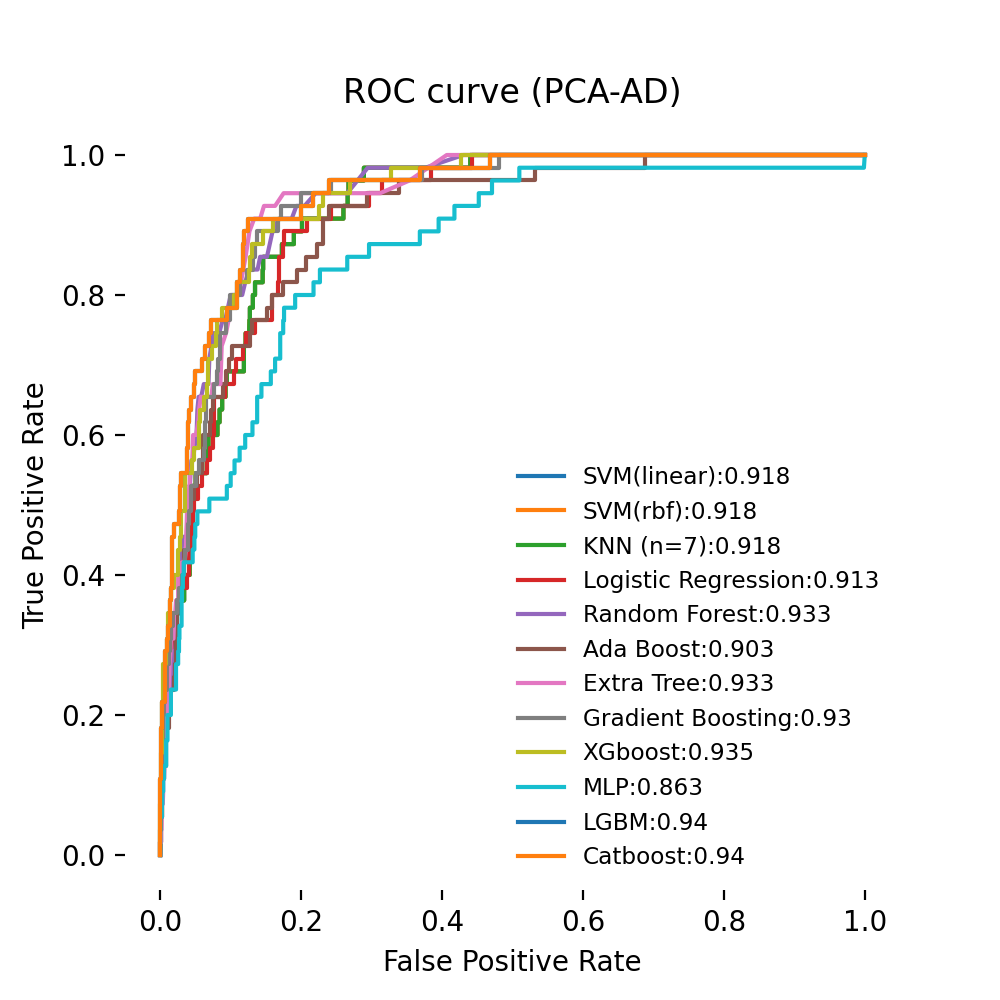

/Users/Norayr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# ROC-AUC curve (PCA)
%matplotlib notebook
plt.figure(figsize=(5,5))

#SVM with linear kernel 
svm_clf = SVC(kernel='linear', probability=True).fit(X_train_ad, y_train_ad)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'SVM(linear):' + str(auc))

#SVM with rbf kernel
svmrbf_clf = SVC(kernel='rbf', probability=True).fit(X_train_ad, y_train_ad)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'SVM(rbf):' + str(auc))

#KNN algorithm with 7 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=7).fit(X_train_ad, y_train_ad)
y_score = svm_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'KNN (n=7):' + str(auc))

# Logistic regression
lg_clf = LogisticRegression().fit(X_train_ad, y_train_ad)
y_score = lg_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Logistic Regression:' + str(auc))

# Random forest 
rf_clf = RandomForestClassifier().fit(X_train_ad, y_train_ad)
y_score = rf_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Random Forest:' + str(auc))

# AdaBoost classifier 
adb_clf = AdaBoostClassifier().fit(X_train_ad, y_train_ad)
y_score = adb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Ada Boost:' + str(auc))

# Extra tree clasifier 
xtr_clf = ExtraTreesClassifier().fit(X_train_ad, y_train_ad)
y_score = xtr_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Extra Tree:' + str(auc))

# Gradient boosting 
gb_clf = GradientBoostingClassifier().fit(X_train_ad, y_train_ad)
y_score = gb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Gradient Boosting:' + str(auc))

# XGradient boosting 
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(X_train_ad, y_train_ad)
y_score = xgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'XGboost:' + str(auc))

# Multilayer perceptron(MLP)
mlp_clf = MLPClassifier(max_iter=1000).fit(X_train_ad, y_train_ad)
y_score = mlp_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'MLP:' + str(auc))

# LGBM
lgb_clf = LGBMClassifier().fit(X_train_ad, y_train_ad)
y_score = lgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'LGBM:' + str(auc))

# Catboost 
cat_clf = CatBoostClassifier(silent=True).fit(X_train_ad, y_train_ad)
y_score = lgb_clf.predict_proba(X_test)[:, 1]
tpr, fpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
plt.plot(tpr, fpr, label = 'Catboost:' + str(auc))


plt.legend(frameon = False, fontsize='small')
plt.title('ROC curve (PCA-AD)')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.savefig('ROC-AUC (PCA-AD)')
plt.show();

In [8]:
built_models = [svm_clf ,svmrbf_clf, knn_clf, lg_clf,
                    rf_clf, adb_clf, xtr_clf, gb_clf, 
                     xgb_clf, mlp_clf, lgb_clf, cat_clf]
models_names = ['svm_clf', 'svmrbf_clf', 'knn_clf', 'lg_clf',
                    'rf_clf', 'adb_clf', 'xtr_clf', 'gb_clf',
                     'xgb_clf', 'mlp_clf', 'lgb_clf', 'cat_clf']
scores = ['accuracy', 'recall', 'precision', 'f1 score', 'roc_auc']
df_scores = pd.DataFrame(np.zeros((len(models_names), len(scores))), columns=scores)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)

In [9]:
for index, model in enumerate(built_models):
    scores = {'acc': 'accuracy',
               'f1_score': 'f1',
                   'recall': 'recall', 
                      'precision' : 'precision', 
                             'roc_auc': 'roc_auc'}
    
    pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature sel', PCA(n_components=20)),
    ('selection', SMOTE()), 
    ('classifier', model)
    ])
    
    scores = cross_validate(pipe, X, y, scoring=scores, cv=cv, return_train_score=False)
    val_scores = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1)
    df_scores.iloc[index, :] = val_scores.mean(axis=0) 
    df_scores.rename({index : models_names[index]}, axis = 0, inplace=True)

In [10]:
df_scores.sort_values('recall', ascending=False)

,accuracy,recall,precision,f1 score,roc_auc
cat_clf,0.947501,0.391636,0.527273,0.312395,0.901440
xgb_clf,0.952192,0.383637,0.459091,0.334722,0.902665
lgb_clf,0.945155,0.380348,0.509091,0.308220,0.901623
xtr_clf,0.965390,0.379707,0.340909,0.439797,0.919924
rf_clf,0.953219,0.375003,0.436364,0.331790,0.908296
mlp_clf,0.954392,0.365834,0.413636,0.334978,0.867754
svmrbf_clf,0.926382,0.330358,0.568182,0.233677,0.889695
gb_clf,0.905410,0.324884,0.700000,0.211807,0.916631
adb_clf,0.889717,0.288485,0.690909,0.182731,0.879030
lg_clf,0.867723,0.286483,0.822727,0.173475,0.925314


In [1]:
#dfi.export(df_scores.sort_values('recall', ascending=False), 'scores-PCA-SMOTE.png')

## Choice 2 ADASYN + PCA results 

In [18]:
from imblearn.over_sampling import ADASYN
for index, model in enumerate(built_models):
    scores = {'acc': 'accuracy',
               'f1_score': 'f1',
                   'recall': 'recall', 
                      'precision' : 'precision', 
                             'roc_auc': 'roc_auc'}
    
    pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature sel', PCA(n_components=20)),
    ('selection', ADASYN()), 
    ('classifier', model)
    ])
    
    scores = cross_validate(pipe, X, y, scoring=scores, cv=cv, return_train_score=False)
    val_scores = pd.DataFrame(scores).drop(['fit_time', 'score_time'], axis = 1)
    df_scores.iloc[index, :] = val_scores.mean(axis=0) 
    df_scores.rename({index : models_names[index]}, axis = 0, inplace=True)

In [19]:
df_scores.sort_values('recall', ascending=False)

,accuracy,recall,precision,f1 score,roc_auc
xgb_clf,0.951898,0.404336,0.518182,0.336022,0.911997
cat_clf,0.945446,0.379717,0.518182,0.302501,0.900750
rf_clf,0.951899,0.371750,0.445455,0.325191,0.916441
xtr_clf,0.964218,0.360079,0.322727,0.426424,0.918238
lgb_clf,0.942806,0.357374,0.495455,0.281800,0.899659
mlp_clf,0.953806,0.334014,0.368182,0.310740,0.864644
gb_clf,0.904236,0.329820,0.727273,0.213631,0.911838
svmrbf_clf,0.921687,0.307524,0.536364,0.216246,0.879585
lg_clf,0.863617,0.281994,0.831818,0.169905,0.925896
svm_clf,0.858925,0.278348,0.836364,0.167369,0.925796


In [2]:
#dfi.export(df_scores.sort_values('recall', ascending=False), 'scores-PCA-ADASYN.png')